In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ANNOTATION_FILE = '/home/lojze/data/datasets/LaRS/split/val/panoptic_annotations.json'
CLS_FILE = '../results_panoptic/mask2former_swin-b-p4-w12-384-in21k_lsj_8x2_20x_LaRS_obst_cls.csv'


In [3]:
with open(ANNOTATION_FILE, 'r') as file:
    ann = json.load(file)
df = pd.read_csv(CLS_FILE)

In [4]:
categories = {cat['id']: cat for cat in ann['categories']}

In [5]:
df

,pred,gt,iou
0,1,1,0.980559
1,3,3,0.985725
2,5,5,0.982365
3,11,11,0.985753
4,1,11,0.001698
...,...,...,...
13149,1,11,0.001154
13150,11,11,0.499619
13151,11,12,0.302716
13152,1,11,0.001099


In [6]:
df_filt = df[df['gt']>10]
# df_filt = df

In [7]:
labels = np.unique(df_filt['pred'])
labels_n = np.array([categories[l]['name'] if l != -1 else 'Void' for l in labels])
labels, labels_n

(array([-1,  1,  3,  5, 11, 12, 13, 14, 15, 16, 17, 19]),
 array(['Void', 'Static Obstacle', 'Water', 'Sky', 'Boat/ship',
        'Row boats', 'Paddle board', 'Buoy', 'Swimmer', 'Animal', 'Float',
        'Other'], dtype='<U15'))

In [8]:
conf_m = confusion_matrix(df_filt['gt'], df_filt['pred'], labels=labels).T

In [12]:
nonzero_y = np.sum(conf_m, axis=1) > 0
nonzero_x = np.sum(conf_m, axis=0) > 0

conf_m_filt = conf_m[nonzero_y]
conf_m_filt = conf_m_filt[:, nonzero_x]
conf_m_gr = (conf_m_filt / conf_m_filt.sum(axis=0, keepdims=True)) * 100

labels_x = labels_n[nonzero_x]
labels_y = labels_n[nonzero_y]

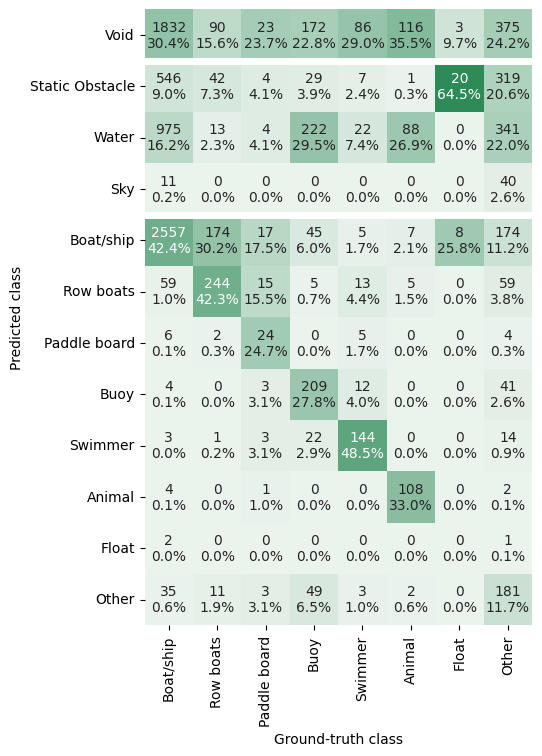

In [ ]:
# Version 1
group_counts = ['{0:0.0f}'.format(value) for value in conf_m_filt.flatten()]
group_percentages = ['{0:.1f}%'.format(value) for value in conf_m_gr.flatten()]
plt_labels = [f"{v1}\n{v2}" for v1, v2 in 
          zip(group_counts,group_percentages)]
N,M = conf_m_filt.shape
plt_labels = np.asarray(plt_labels).reshape(N, M)
my_cmap = sns.light_palette("seagreen", as_cmap=True)
_,ax = plt.subplots(figsize=(5,8))
sns.heatmap(conf_m_gr, ax=ax, annot=plt_labels, fmt='', cmap=my_cmap, cbar=False, xticklabels=labels_x.tolist(), yticklabels=labels_y.tolist())
ax.set_ylabel('Predicted class')
ax.set_xlabel('Ground-truth class')

# Separation lines
for i in [1,4]:
    ax.axhline(i, c='w', lw=5)

# plt.savefig('figures/m2f_confm.pdf', bbox_inches='tight')

Text(0.5, 58.7222222222223, 'Ground-truth class')

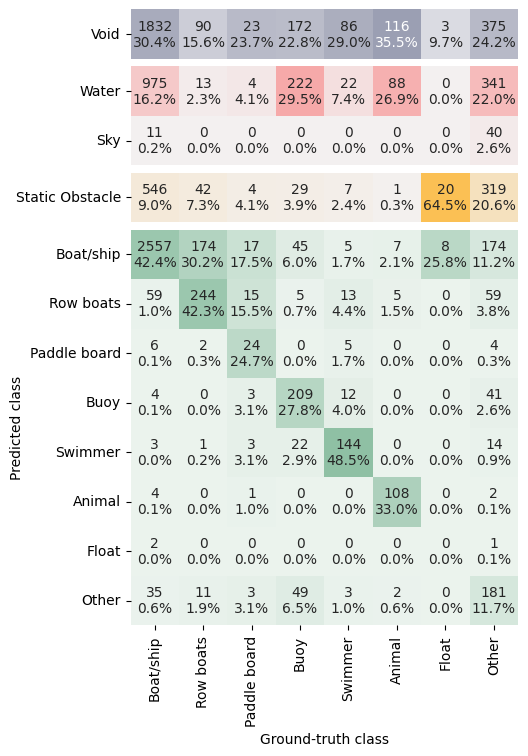

In [37]:
# Version 2
vmin = 0
vmax = 100

group_counts = ['{0:0.0f}'.format(value) for value in conf_m_filt.flatten()]
group_percentages = ['{0:.1f}%'.format(value) for value in conf_m_gr.flatten()]
plt_labels = [f"{v1}\n{v2}" for v1, v2 in 
          zip(group_counts,group_percentages)]
N,M = conf_m_filt.shape
plt_labels = np.asarray(plt_labels).reshape(N, M)
my_cmap1 = sns.light_palette("#000A3D", as_cmap=True)
my_cmap2 = sns.light_palette("red", as_cmap=True)
my_cmap3 = sns.light_palette("orange", as_cmap=True)
my_cmap4 = sns.light_palette("seagreen", as_cmap=True)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, figsize=(5,8), gridspec_kw=dict(height_ratios=[1,2,1,8]))
plt.subplots_adjust(hspace=0.05)

sns.heatmap(conf_m_gr[0:1], ax=ax1, annot=plt_labels[0:1], fmt='', cmap=my_cmap1, cbar=False, yticklabels=labels_y.tolist()[0:1], vmin=vmin, vmax=vmax, xticklabels=False)
ax1.tick_params(axis='y', rotation=0)
sns.heatmap(conf_m_gr[2:4], ax=ax2, annot=plt_labels[2:4], fmt='', cmap=my_cmap2, cbar=False, yticklabels=labels_y.tolist()[2:4], vmin=vmin, vmax=vmax, xticklabels=False)
ax2.tick_params(axis='y', rotation=0)
sns.heatmap(conf_m_gr[1:2], ax=ax3, annot=plt_labels[1:2], fmt='', cmap=my_cmap3, cbar=False, yticklabels=labels_y.tolist()[1:2], vmin=vmin, vmax=vmax, xticklabels=False)
ax3.tick_params(axis='y', rotation=0)
sns.heatmap(conf_m_gr[4:], ax=ax4, annot=plt_labels[4:], fmt='', cmap=my_cmap4, cbar=False, yticklabels=labels_y.tolist()[4:], vmin=vmin, vmax=vmax, xticklabels=labels_x.tolist())

ax4.set_ylabel('Predicted class')
ax4.set_xlabel('Ground-truth class')

plt.savefig('figures/m2f_confm.pdf', bbox_inches='tight')